In [ ]:
#Your job to do: 
#• Hired to deliver actionable insight to support your client (NGO)

#Clients wants:
#• Use previous postcard mail solicitation for donations to improve outcome in next campaign

#You want:
#•	Determine which individuals in their mailing database have characteristics similar to those of your most profitable donors

#Goal: 
#•By soliciting only these people, your client can spend less money on solicitation effort and more money on charitable concerns




In [1]:
#Data Preparation and Analysis Library
import numpy as np
import pandas as pd

#Data visualisations Library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from seaborn import countplot
from matplotlib.pyplot import figure, show

#Libary to selecting the most important independent variables/predictors to predict the target
import sklearn.feature_selection

#ML Algorithms/Models Library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC

#Libary to split data into traning set and testing set
from sklearn.model_selection import train_test_split

# Libary is used for evaluating the performance of our model
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Read or Load The Data Sets From Data Source

In [2]:
# Historical data, containing previous donor details
Donors_hist_data = pd.read_csv('Donor Raw Data_ML with Python.csv')

In [3]:
 # Prospective Donors -this is a list of new contact
Donors_prosp_data = pd.read_csv('Prospective Donor_ML with Python.csv')

In [4]:
#Head Historical Data
Donors_hist_data.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


# Understanding the Data Sets

In [5]:
#Information of Donors Prospectives Data
Donors_prosp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 48 columns):
CONTROL_NUMBER                 2148 non-null int64
MONTHS_SINCE_ORIGIN            2148 non-null int64
DONOR_AGE                      1619 non-null float64
IN_HOUSE                       2148 non-null int64
URBANICITY                     2148 non-null object
SES                            2148 non-null object
CLUSTER_CODE                   2148 non-null object
HOME_OWNER                     2148 non-null object
DONOR_GENDER                   2148 non-null object
INCOME_GROUP                   1667 non-null float64
PUBLISHED_PHONE                2148 non-null int64
OVERLAY_SOURCE                 2148 non-null object
MOR_HIT_RATE                   2148 non-null int64
WEALTH_RATING                  1142 non-null float64
MEDIAN_HOME_VALUE              2148 non-null int64
MEDIAN_HOUSEHOLD_INCOME        2148 non-null int64
PCT_OWNER_OCCUPIED             2148 non-null int64
PER_CAPITA_INC

In [6]:
#Tail Historical Data
Donors_hist_data.tail()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
19367,0,NaN,191687,89,66.0,1,U,1,03,H,...,22.0,25.0,3.0,15.0,6,13,18,81,17.17,3
19368,0,NaN,191710,137,77.0,1,C,1,24,H,...,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13
19369,0,NaN,191746,29,NaN,1,S,1,11,U,...,0.0,15.0,15.0,15.0,3,9,23,23,15.00,0
19370,0,NaN,191775,129,78.0,1,?,?,.,U,...,20.0,25.0,5.0,25.0,7,24,8,129,18.33,11
19371,1,150.0,191779,29,70.0,0,?,?,.,U,...,0.0,25.0,25.0,25.0,4,9,24,24,25.00,1


In [7]:
# Shape Historical Data
Donors_hist_data.shape

(19372, 50)

In [8]:
# Describe Historical Data 
Donors_hist_data.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,14980.000000,19372.000000,19372.000000,10562.000000,...,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,3.907543,0.497729,3.361656,5.005397,...,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,1.864796,0.500008,9.503481,2.815386,...,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,2.000000,0.000000,0.000000,3.000000,...,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,4.000000,0.000000,0.000000,5.000000,...,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,241.000000,9.000000,...,997.000000,1000.000000,450.000000,450.000000,17.000000,64.000000,27.000000,260.000000,450.000000,41.000000


In [9]:
#Information Donors Historical Data 
Donors_hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
TARGET_B                       19372 non-null int64
TARGET_D                       4843 non-null float64
CONTROL_NUMBER                 19372 non-null int64
MONTHS_SINCE_ORIGIN            19372 non-null int64
DONOR_AGE                      14577 non-null float64
IN_HOUSE                       19372 non-null int64
URBANICITY                     19372 non-null object
SES                            19372 non-null object
CLUSTER_CODE                   19372 non-null object
HOME_OWNER                     19372 non-null object
DONOR_GENDER                   19372 non-null object
INCOME_GROUP                   14980 non-null float64
PUBLISHED_PHONE                19372 non-null int64
OVERLAY_SOURCE                 19372 non-null object
MOR_HIT_RATE                   19372 non-null int64
WEALTH_RATING                  10562 non-null float64
MEDIAN_HOME_VALUE              19372 non-null 

In [10]:
#Sum of Isnull Values of Donors Historical Data
Donors_hist_data.isnull().sum()

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                       4795
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [11]:
#Checking for duplicated sum values of Donors Historical Data
Donors_hist_data.duplicated().sum()

0

In [12]:
#Columns of Donors Historical Data
Donors_hist_data.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER

In [13]:
#Analyzing Donors Historical Data Sets
Donors_hist_data.mean()

TARGET_B                           0.250000
TARGET_D                          15.624344
CONTROL_NUMBER                 96546.225377
MONTHS_SINCE_ORIGIN               73.409973
DONOR_AGE                         58.919051
IN_HOUSE                           0.073198
INCOME_GROUP                       3.907543
PUBLISHED_PHONE                    0.497729
MOR_HIT_RATE                       3.361656
WEALTH_RATING                      5.005397
MEDIAN_HOME_VALUE               1079.871929
MEDIAN_HOUSEHOLD_INCOME          341.970215
PCT_OWNER_OCCUPIED                69.698999
PER_CAPITA_INCOME              15857.334452
PCT_ATTRIBUTE1                     1.029011
PCT_ATTRIBUTE2                    30.573921
PCT_ATTRIBUTE3                    29.603293
PCT_ATTRIBUTE4                    32.852467
PEP_STAR                           0.504439
RECENT_STAR_STATUS                 0.931138
FREQUENCY_STATUS_97NK              1.983998
RECENT_RESPONSE_PROP               0.190127
RECENT_AVG_GIFT_AMT             

In [14]:
#Analyzing Donors Prospective Data Sets
Donors_prosp_data.mean()

CONTROL_NUMBER                 96146.865456
MONTHS_SINCE_ORIGIN               73.631285
DONOR_AGE                         58.185917
IN_HOUSE                           0.067970
INCOME_GROUP                       3.902819
PUBLISHED_PHONE                    0.493017
MOR_HIT_RATE                       3.357076
WEALTH_RATING                      4.974606
MEDIAN_HOME_VALUE               1028.019088
MEDIAN_HOUSEHOLD_INCOME          339.798417
PCT_OWNER_OCCUPIED                70.439013
PER_CAPITA_INCOME              15514.582402
PCT_ATTRIBUTE1                     1.130354
PCT_ATTRIBUTE2                    30.445996
PCT_ATTRIBUTE3                    30.144786
PCT_ATTRIBUTE4                    32.025605
PEP_STAR                           0.496276
RECENT_STAR_STATUS                 0.811918
FREQUENCY_STATUS_97NK              1.986499
RECENT_RESPONSE_PROP               0.191590
RECENT_AVG_GIFT_AMT               15.072658
RECENT_CARD_RESPONSE_PROP          0.229963
RECENT_AVG_CARD_GIFT_AMT        

In [15]:
#Sum of Isnull Values of Donors Prospective Data
Donors_prosp_data.isnull().sum()

CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
DONOR_AGE                       529
IN_HOUSE                          0
URBANICITY                        0
SES                               0
CLUSTER_CODE                      0
HOME_OWNER                        0
DONOR_GENDER                      0
INCOME_GROUP                    481
PUBLISHED_PHONE                   0
OVERLAY_SOURCE                    0
MOR_HIT_RATE                      0
WEALTH_RATING                  1006
MEDIAN_HOME_VALUE                 0
MEDIAN_HOUSEHOLD_INCOME           0
PCT_OWNER_OCCUPIED                0
PER_CAPITA_INCOME                 0
PCT_ATTRIBUTE1                    0
PCT_ATTRIBUTE2                    0
PCT_ATTRIBUTE3                    0
PCT_ATTRIBUTE4                    0
PEP_STAR                          0
RECENT_STAR_STATUS                0
RECENCY_STATUS_96NK               0
FREQUENCY_STATUS_97NK             0
RECENT_RESPONSE_PROP              0
RECENT_AVG_GIFT_AMT         

# Cleaning Donors_hist_data

In [16]:
#Replacing the following characters ('?' and ' .') with the mode values of associated columns.
k = Donors_hist_data['URBANICITY'].mode()
k# Replacing "?" with mode column value
URBANICITY=[]
for i in Donors_hist_data['URBANICITY']:    
    
    if i =='?':
        i= 'S'
        URBANICITY.append(i)
    else:
        i=i
        URBANICITY.append(i)

In [17]:
Donors_hist_data['URBANICITY']= URBANICITY 

In [18]:
Donors_hist_data.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,S,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [19]:
Donors_hist_data['SES'].mode()

0    2
dtype: object

In [20]:
# Replacing "?" with mode column value
SES=[]
for i in Donors_hist_data['SES']:
    if i=='?':
        i='2'
        SES.append(i)
    else:
        i=i
        SES.append(i)

In [21]:
Donors_hist_data['SES']=SES

In [22]:
Donors_hist_data.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,S,2,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [23]:
Donors_hist_data['CLUSTER_CODE'].mode()

0    40
dtype: object

In [24]:
# Replacing "." with mode column value
CLUSTER_CODE=[]
for i in Donors_hist_data['CLUSTER_CODE']:    
    
    if i ==' .':
        i= '40'
        CLUSTER_CODE.append(i)
    else:
        i=i
        CLUSTER_CODE.append(i)

In [25]:
Donors_hist_data['CLUSTER_CODE']=CLUSTER_CODE

In [26]:
Donors_hist_data.head(5)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,S,2,40,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


# Dealing With Missing Values 

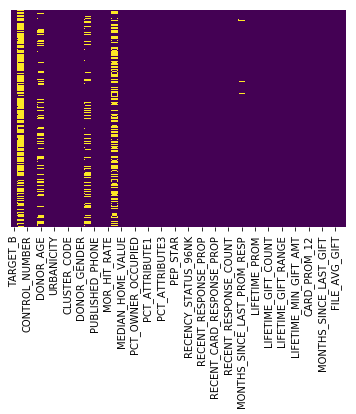

In [27]:
# heatmap to show missing values
sns.heatmap(Donors_hist_data.isnull(),yticklabels=False,xticklabels=2,cbar=False,cmap='viridis')

In [28]:
# 1st step calculate the median
#Analyzing Donors Historical Data Sets
Donors_hist_data.mean()

TARGET_B                       2.500000e-01
TARGET_D                       1.562434e+01
CONTROL_NUMBER                 9.654623e+04
MONTHS_SINCE_ORIGIN            7.340997e+01
DONOR_AGE                      5.891905e+01
IN_HOUSE                       7.319843e-02
SES                                     inf
CLUSTER_CODE                            inf
INCOME_GROUP                   3.907543e+00
PUBLISHED_PHONE                4.977287e-01
MOR_HIT_RATE                   3.361656e+00
WEALTH_RATING                  5.005397e+00
MEDIAN_HOME_VALUE              1.079872e+03
MEDIAN_HOUSEHOLD_INCOME        3.419702e+02
PCT_OWNER_OCCUPIED             6.969900e+01
PER_CAPITA_INCOME              1.585733e+04
PCT_ATTRIBUTE1                 1.029011e+00
PCT_ATTRIBUTE2                 3.057392e+01
PCT_ATTRIBUTE3                 2.960329e+01
PCT_ATTRIBUTE4                 3.285247e+01
PEP_STAR                       5.044394e-01
RECENT_STAR_STATUS             9.311377e-01
FREQUENCY_STATUS_97NK          1

In [29]:
# 1st step calculate the median
#Analyzing Donors Prospective Data Sets
Donors_prosp_data.median()

CONTROL_NUMBER                 96092.000
MONTHS_SINCE_ORIGIN               65.000
DONOR_AGE                         59.000
IN_HOUSE                           0.000
INCOME_GROUP                       4.000
PUBLISHED_PHONE                    0.000
MOR_HIT_RATE                       0.000
WEALTH_RATING                      5.000
MEDIAN_HOME_VALUE                738.500
MEDIAN_HOUSEHOLD_INCOME          314.000
PCT_OWNER_OCCUPIED                76.000
PER_CAPITA_INCOME              13810.500
PCT_ATTRIBUTE1                     0.000
PCT_ATTRIBUTE2                    31.000
PCT_ATTRIBUTE3                    30.000
PCT_ATTRIBUTE4                    32.000
PEP_STAR                           0.000
RECENT_STAR_STATUS                 0.000
FREQUENCY_STATUS_97NK              2.000
RECENT_RESPONSE_PROP               0.167
RECENT_AVG_GIFT_AMT               14.000
RECENT_CARD_RESPONSE_PROP          0.200
RECENT_AVG_CARD_GIFT_AMT          10.000
RECENT_RESPONSE_COUNT              2.000
RECENT_CARD_RESP

In [30]:
Donors_hist_data.isnull().sum()

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                       4795
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [31]:
Donors_hist_data.DONOR_AGE.fillna(value=59, inplace=True)

In [32]:
Donors_hist_data.INCOME_GROUP.fillna(value=4, inplace=True)

In [33]:
Donors_hist_data.WEALTH_RATING.fillna(value=5, inplace=True)  

In [34]:
Donors_hist_data.MONTHS_SINCE_LAST_PROM_RESP.fillna(value =19, inplace=True)

In [35]:
#Confirm missing values replaced

Donors_hist_data.isnull().sum()

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                          0
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                       0
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                      0
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [36]:
#Imputation/replacing of missing values for Donors prospects (Donors_prop_data)

In [37]:
Donors_prosp_data.DONOR_AGE.fillna(value=59, inplace=True)

In [38]:
Donors_prosp_data.INCOME_GROUP.fillna(value=4, inplace=True)  

In [39]:
Donors_prosp_data.WEALTH_RATING.fillna(value=5, inplace=True)

In [40]:
Donors_prosp_data.MONTHS_SINCE_LAST_PROM_RESP.fillna(value =19, inplace=True)

In [41]:
Donors_prosp_data.isnull().sum()

CONTROL_NUMBER                 0
MONTHS_SINCE_ORIGIN            0
DONOR_AGE                      0
IN_HOUSE                       0
URBANICITY                     0
SES                            0
CLUSTER_CODE                   0
HOME_OWNER                     0
DONOR_GENDER                   0
INCOME_GROUP                   0
PUBLISHED_PHONE                0
OVERLAY_SOURCE                 0
MOR_HIT_RATE                   0
WEALTH_RATING                  0
MEDIAN_HOME_VALUE              0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PER_CAPITA_INCOME              0
PCT_ATTRIBUTE1                 0
PCT_ATTRIBUTE2                 0
PCT_ATTRIBUTE3                 0
PCT_ATTRIBUTE4                 0
PEP_STAR                       0
RECENT_STAR_STATUS             0
RECENCY_STATUS_96NK            0
FREQUENCY_STATUS_97NK          0
RECENT_RESPONSE_PROP           0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_PROP      0
RECENT_AVG_CARD_GIFT_AMT       0
RECENT_RES

In [ ]:
# Target_D variable has 14529 missing value, because it records response amount only,
# and assumes missing values for none response. Therefore, it will be neccessary to drop this variable.
# The alternative is to take none response values to '0' by default, which in turn might sends a wrong message to the model.

In [42]:
Donors_hist_data.drop(['TARGET_D'], axis=1, inplace=True)

In [43]:
Donors_hist_data.tail()

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
19367,0,191687,89,66.0,1,U,1,03,H,F,...,22.0,25.0,3.0,15.0,6,13,18,81,17.17,3
19368,0,191710,137,77.0,1,C,1,24,H,F,...,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13
19369,0,191746,29,59.0,1,S,1,11,U,M,...,0.0,15.0,15.0,15.0,3,9,23,23,15.00,0
19370,0,191775,129,78.0,1,S,2,40,U,M,...,20.0,25.0,5.0,25.0,7,24,8,129,18.33,11
19371,1,191779,29,70.0,0,S,2,40,U,M,...,0.0,25.0,25.0,25.0,4,9,24,24,25.00,1


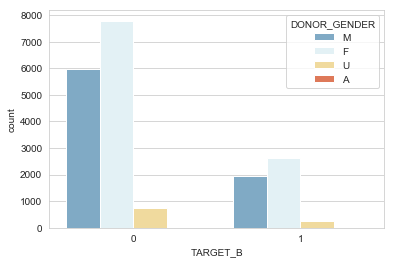

In [44]:
# Donors/none Donors in relation to Gender
sns.set_style('whitegrid')
sns.countplot(x='TARGET_B',hue='DONOR_GENDER',data=Donors_hist_data,palette='RdYlBu_r')

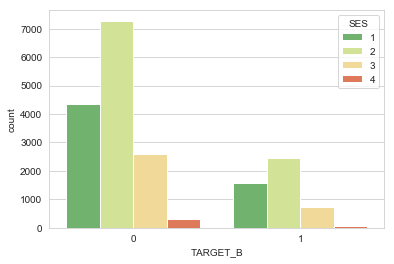

In [45]:
# Donors/none Donors in relation to 5 socio-economic cluster codes
sns.set_style('whitegrid')
sns.countplot(x='TARGET_B',hue='SES',data=Donors_hist_data,palette='RdYlGn_r')

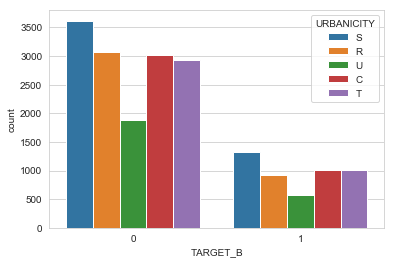

In [46]:
sns.countplot(x='TARGET_B', hue='URBANICITY', data=Donors_hist_data)

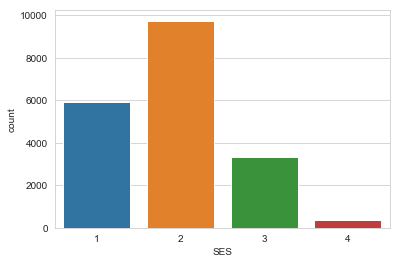

In [47]:
sns.countplot(x='SES', data=Donors_hist_data)

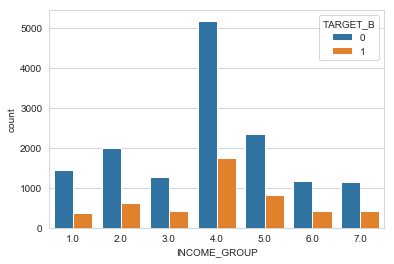

In [48]:
sns.countplot(x='INCOME_GROUP', hue='TARGET_B', data=Donors_hist_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002159E4C1860>]],
      dtype=object)

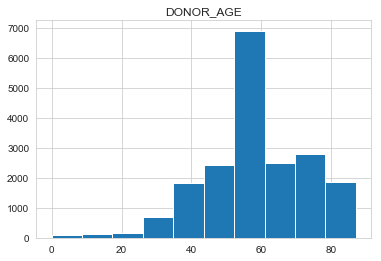

In [49]:
Donors_hist_data.hist(column='DONOR_AGE', grid=True, bins=10)

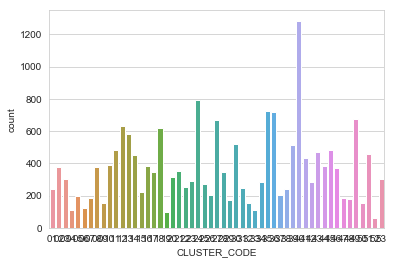

In [50]:
sns.countplot(x='CLUSTER_CODE', data=Donors_hist_data)

# Tranforming Donor_hist_data Set Categorical Variables to Numeric using Label Encoding

In [51]:
Donors_hist_data_encoded = pd.get_dummies(Donors_hist_data, columns = ['URBANICITY','SES','CLUSTER_CODE','HOME_OWNER','DONOR_GENDER',
'OVERLAY_SOURCE','RECENCY_STATUS_96NK'], drop_first = False)

In [52]:
Donors_hist_data_encoded.head(5)

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,...,OVERLAY_SOURCE_B,OVERLAY_SOURCE_M,OVERLAY_SOURCE_N,OVERLAY_SOURCE_P,RECENCY_STATUS_96NK_A,RECENCY_STATUS_96NK_E,RECENCY_STATUS_96NK_F,RECENCY_STATUS_96NK_L,RECENCY_STATUS_96NK_N,RECENCY_STATUS_96NK_S
0,0,5,101,87.0,0,2.0,0,0,5.0,554,...,0,0,0,1,1,0,0,0,0,0
1,1,12,137,79.0,0,7.0,0,0,3.0,334,...,0,0,0,1,0,0,0,0,0,1
2,0,37,113,75.0,0,5.0,0,0,9.0,2388,...,0,0,0,1,0,0,0,0,0,1
3,0,38,92,59.0,0,6.0,1,0,4.0,1688,...,1,0,0,0,1,0,0,0,0,0
4,0,41,101,74.0,0,2.0,1,8,5.0,514,...,1,0,0,0,1,0,0,0,0,0


# Tranforming Donor_prosp_data Set Categorical Variables to Numeric using Label Encoding

In [53]:
Donors_prosp_data_encoded = pd.get_dummies(Donors_prosp_data, columns = ['URBANICITY','SES','CLUSTER_CODE','HOME_OWNER','DONOR_GENDER',
'OVERLAY_SOURCE','RECENCY_STATUS_96NK'], drop_first = False)

In [54]:
Donors_prosp_data_encoded.head(5)

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,...,OVERLAY_SOURCE_B,OVERLAY_SOURCE_M,OVERLAY_SOURCE_N,OVERLAY_SOURCE_P,RECENCY_STATUS_96NK_A,RECENCY_STATUS_96NK_E,RECENCY_STATUS_96NK_F,RECENCY_STATUS_96NK_L,RECENCY_STATUS_96NK_N,RECENCY_STATUS_96NK_S
0,139,101,59.0,0,4.0,0,0,5.0,655,219,...,0,0,1,0,1,0,0,0,0,0
1,142,137,59.0,0,4.0,1,0,1.0,475,227,...,0,0,1,0,0,0,0,0,0,1
2,282,17,30.0,0,6.0,1,11,5.0,1117,544,...,1,0,0,0,0,0,1,0,0,0
3,368,137,75.0,0,6.0,1,1,7.0,2257,485,...,1,0,0,0,1,0,0,0,0,0
4,387,5,59.0,0,2.0,0,0,5.0,789,413,...,1,0,0,0,1,0,0,0,0,0


In [55]:
Donors_hist_data_encoded.head(5)

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,...,OVERLAY_SOURCE_B,OVERLAY_SOURCE_M,OVERLAY_SOURCE_N,OVERLAY_SOURCE_P,RECENCY_STATUS_96NK_A,RECENCY_STATUS_96NK_E,RECENCY_STATUS_96NK_F,RECENCY_STATUS_96NK_L,RECENCY_STATUS_96NK_N,RECENCY_STATUS_96NK_S
0,0,5,101,87.0,0,2.0,0,0,5.0,554,...,0,0,0,1,1,0,0,0,0,0
1,1,12,137,79.0,0,7.0,0,0,3.0,334,...,0,0,0,1,0,0,0,0,0,1
2,0,37,113,75.0,0,5.0,0,0,9.0,2388,...,0,0,0,1,0,0,0,0,0,1
3,0,38,92,59.0,0,6.0,1,0,4.0,1688,...,1,0,0,0,1,0,0,0,0,0
4,0,41,101,74.0,0,2.0,1,8,5.0,514,...,1,0,0,0,1,0,0,0,0,0


In [56]:
Donors_hist_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Columns: 120 entries, TARGET_B to RECENCY_STATUS_96NK_S
dtypes: float64(15), int64(27), uint8(78)
memory usage: 7.6 MB


In [57]:
Donors_prosp_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Columns: 121 entries, CONTROL_NUMBER to RECENCY_STATUS_96NK_S
dtypes: float64(15), int64(26), uint8(80)
memory usage: 855.9 KB


In [58]:
# Grab feature_columns for Donors_hist_data_encoded
feature_columns = Donors_hist_data_encoded.drop('TARGET_B',axis=1)

In [59]:
target=Donors_hist_data_encoded['TARGET_B']

In [60]:
feature_columns.head(2)

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,...,OVERLAY_SOURCE_B,OVERLAY_SOURCE_M,OVERLAY_SOURCE_N,OVERLAY_SOURCE_P,RECENCY_STATUS_96NK_A,RECENCY_STATUS_96NK_E,RECENCY_STATUS_96NK_F,RECENCY_STATUS_96NK_L,RECENCY_STATUS_96NK_N,RECENCY_STATUS_96NK_S
0,5,101,87.0,0,2.0,0,0,5.0,554,294,...,0,0,0,1,1,0,0,0,0,0
1,12,137,79.0,0,7.0,0,0,3.0,334,212,...,0,0,0,1,0,0,0,0,0,1


# Selection of most important independent variables to predict (TARGET_B)

In [61]:
# KBEST to choose only the 8 most important variables from Donors historical records
K_Best = sklearn.feature_selection.SelectKBest(k = 25)  # instantiate the KBest algorithm
selected_features = K_Best.fit(feature_columns, target) 
indices_selected = selected_features.get_support(indices=True)

chosen_cols = [feature_columns.columns[i] for i in indices_selected]

In [ ]:
# Choosing the most important variables for Donors prospects - New contact list

#KBEST to choose only the 8 most important variables
#K_Best = sklearn.feature_selection.SelectKBest(k = 25)  # instantiate the KBest algorithm
#selected_features = K_Best.fit(feature_columns, target) 
#indices_selected = selected_features.get_support(indices=True)

#chosen_cols_prosp = [feature_columns.columns[i] for i in indices_selected]

In [62]:
chosen_cols

['MONTHS_SINCE_ORIGIN',
 'MEDIAN_HOME_VALUE',
 'PER_CAPITA_INCOME',
 'PEP_STAR',
 'FREQUENCY_STATUS_97NK',
 'RECENT_RESPONSE_PROP',
 'RECENT_AVG_GIFT_AMT',
 'RECENT_CARD_RESPONSE_PROP',
 'RECENT_RESPONSE_COUNT',
 'RECENT_CARD_RESPONSE_COUNT',
 'MONTHS_SINCE_LAST_PROM_RESP',
 'LIFETIME_CARD_PROM',
 'LIFETIME_PROM',
 'LIFETIME_GIFT_AMOUNT',
 'LIFETIME_GIFT_COUNT',
 'LIFETIME_AVG_GIFT_AMT',
 'LIFETIME_MIN_GIFT_AMT',
 'LAST_GIFT_AMT',
 'MONTHS_SINCE_LAST_GIFT',
 'MONTHS_SINCE_FIRST_GIFT',
 'FILE_AVG_GIFT',
 'FILE_CARD_GIFT',
 'RECENCY_STATUS_96NK_A',
 'RECENCY_STATUS_96NK_F',
 'RECENCY_STATUS_96NK_S']

In [63]:
X=Donors_hist_data_encoded[chosen_cols]
y=target

In [64]:
X.head()

,MONTHS_SINCE_ORIGIN,MEDIAN_HOME_VALUE,PER_CAPITA_INCOME,PEP_STAR,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,...,LIFETIME_AVG_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT,RECENCY_STATUS_96NK_A,RECENCY_STATUS_96NK_F,RECENCY_STATUS_96NK_S
0,101,554,11855,1,1,0.067,15.00,0.000,1,0,...,8.49,5.0,15.0,26,92,8.49,7,1,0,0
1,137,334,10385,1,2,0.235,15.00,0.250,4,2,...,14.72,5.0,17.0,7,122,14.72,12,0,0,1
2,113,2388,30855,1,3,0.409,21.67,0.545,9,6,...,16.75,5.0,19.0,6,105,16.75,16,0,0,1
3,92,1688,16342,1,3,0.474,13.44,0.400,9,4,...,11.76,3.0,15.0,6,92,11.76,12,1,0,0
4,101,514,12107,0,1,0.100,17.50,0.111,2,1,...,8.83,5.0,25.0,18,92,8.83,3,1,0,0


In [65]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: TARGET_B, dtype: int64

# Train Test Split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Building a Model - Decision Tree

In [67]:
DTree = tree.DecisionTreeClassifier() # instantiating the algorithm

In [68]:
DTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
# Using the model to predict X_test with out y_test (TARGET_D)
DTree_pred = DTree.predict(X_test)

In [70]:
DTree_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

# Evaluating the model by comparing y_test(TARGET_B) and predicted values(DTree_pred)

In [71]:
DTree_Score = accuracy_score(y_test, DTree_pred)

In [72]:
print("the accuracy of the Dec Tree model is : ", DTree_Score)

the accuracy of the Dec Tree model is :  0.6259971844204599


In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_test,DTree_pred))

             precision    recall  f1-score   support

          0       0.76      0.73      0.75      4796
          1       0.28      0.31      0.29      1597

avg / total       0.64      0.63      0.63      6393



In [75]:
print(confusion_matrix(y_test,DTree_pred))

[[3508 1288]
 [1103  494]]


In [ ]:
#pd.crosstab(y_test['TARGET_B'], DTree_pred, rownames= ['Actual'], colnames= ['Predicted'])

# Random Forest

In [76]:
# instantiating the algorithm
randForest = RandomForestClassifier(n_estimators= 23, min_samples_split=15, max_depth=7, max_features= 5) 

In [77]:
randForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
# Using the model to predict the test data without Loan_Status.

RandFor_Pred = randForest.predict(X_test)

# Model Evaluation

In [79]:
RandFor_Score = accuracy_score(y_test, RandFor_Pred)

In [80]:
print("Accuracy of Random Forest Model is :", RandFor_Score)

Accuracy of Random Forest Model is : 0.7506647896136399


In [81]:
print(classification_report(y_test,RandFor_Pred))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86      4796
          1       0.54      0.01      0.02      1597

avg / total       0.70      0.75      0.65      6393



In [82]:
print(confusion_matrix(y_test,RandFor_Pred))

[[4779   17]
 [1577   20]]


# Most important and independent features/variables influencing the prediction

In [83]:
# Most importance features/independent variables/predictors influencing prediction
feature_importances = pd.DataFrame(randForest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [84]:
feature_importances.head()

,importance
MEDIAN_HOME_VALUE,0.091907
LAST_GIFT_AMT,0.071019
MONTHS_SINCE_LAST_GIFT,0.066452
LIFETIME_PROM,0.064054
FREQUENCY_STATUS_97NK,0.061812


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


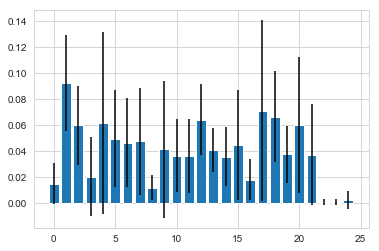

In [85]:
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
#from sklearn.ensemble import RandomForestClassifier

#clf = RandomForestClassifier()
#randForest.fit(X_train.values, RandFor_Pred.values.ravel())

importance = randForest.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in randForest.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]

plt.bar(x, y, yerr=yerr, align="center")

plt.show()

Feature ranking:
1. feature 1 (0.091907)
2. feature 17 (0.071019)
3. feature 18 (0.066452)
4. feature 12 (0.064054)
5. feature 4 (0.061812)
6. feature 20 (0.060222)
7. feature 2 (0.059768)
8. feature 5 (0.049636)
9. feature 7 (0.047528)
10. feature 6 (0.046554)
11. feature 15 (0.044764)
12. feature 9 (0.041295)
13. feature 13 (0.041084)
14. feature 19 (0.037611)
15. feature 21 (0.037332)
16. feature 10 (0.036457)
17. feature 11 (0.036349)
18. feature 14 (0.035796)
19. feature 3 (0.020449)
20. feature 16 (0.018155)
21. feature 0 (0.015066)
22. feature 8 (0.011889)
23. feature 24 (0.002538)
24. feature 23 (0.001247)
25. feature 22 (0.001016)


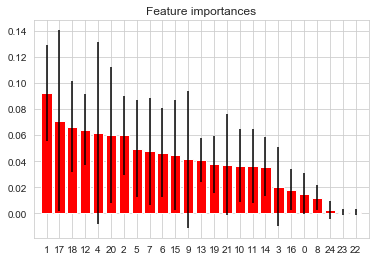

In [86]:
importances = randForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Building a Logistic Regression Model

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
Logreg_m = LogisticRegression() # Instantiating the algorithm

In [89]:
Logreg_m.fit(X_train,y_train)# Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
Logreg_m_pred=Logreg_m.predict(X_test) # Predicting the test sets data  (X_test) without the dependent variable-TARGET_B

In [91]:
Logreg_m_pred # Show predicted values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
# determine accuracy score by comparing actual(y_test) and predicted (Logreg_m_pred)
LogReg_Score = accuracy_score(y_test, Logreg_m_pred)

In [93]:
LogReg_Score

0.7520725793837009

In [94]:
print(classification_report(y_test,Logreg_m_pred))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86      4796
          1       0.67      0.02      0.03      1597

avg / total       0.73      0.75      0.65      6393



In [95]:
print(confusion_matrix(y_test,Logreg_m_pred))

[[4784   12]
 [1573   24]]


# KNeighbors 

In [96]:
KNN = KNeighborsClassifier(n_neighbors= 5) # instantiating the algorithm

In [97]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [98]:
KNN_pred = KNN.predict(X_test)

In [99]:
KNN_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [100]:
from sklearn.metrics import confusion_matrix,classification_report

In [101]:
# determine accuracy score by comparing actual(y_test) and predicted (Logreg_m_pred)
KNN_score = accuracy_score(y_test, KNN_pred)

In [102]:
KNN_score

0.7043641482871891

In [103]:
print(classification_report(y_test,KNN_pred))

             precision    recall  f1-score   support

          0       0.75      0.90      0.82      4796
          1       0.28      0.11      0.16      1597

avg / total       0.63      0.70      0.66      6393



In [104]:
print(confusion_matrix(y_test,KNN_pred))

[[4323  473]
 [1417  180]]


# Build Support Vector Machine

In [105]:
model=SVC()

In [106]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [107]:
SVC_pred=model.predict(X_test)

In [108]:
SVC_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
SVC_score = accuracy_score(y_test, SVC_pred)
SVC_score

0.750195526356953

In [110]:
print(classification_report(y_test,SVC_pred))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86      4796
          1       0.00      0.00      0.00      1597

avg / total       0.56      0.75      0.64      6393



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [111]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [114]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7499422232493644, total=  28.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.5s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7498844197873324, total=  28.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.4min remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7498844197873324, total=  28.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7499422232493644, total=  29.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7498844197873324, total=  29.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7498844197873324, total=  29.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7499422232493644, total=  31.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7498844197873324, total=  31.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7498844197873324, total=  31.4s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.66458622283865, total=  29.3s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.6664355062413315, total=  28.7s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7499422232493644, total=  27.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7498844197873324, total=  26.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7498844197873324, total=  27.6s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7499422232493644, total=  27.8s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7496532593619972, total=  26.4s
[CV] C=1000, gamma=0.1, kernel=rbf ....

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 75.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [115]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [116]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
grid_predictions = grid.predict(X_test)

In [118]:
grid_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86      4796
          1       0.00      0.00      0.00      1597

avg / total       0.56      0.75      0.64      6393



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [120]:
print(confusion_matrix(y_test,grid_predictions))

[[4796    0]
 [1597    0]]


# Making a finalised model and predict Donors prospects to reach out to

In [121]:
X_new = ['MONTHS_SINCE_ORIGIN', 'MEDIAN_HOME_VALUE', 'PER_CAPITA_INCOME', 'PEP_STAR', 'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM', 'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT', 'RECENCY_STATUS_96NK_A', 'RECENCY_STATUS_96NK_F', 'RECENCY_STATUS_96NK_S']

Xnew=Donors_prosp_data_encoded[X_new]
#Xnew=Donors_prosp_data_encoded[chosen_cols]

In [122]:
Xnew.head()

,MONTHS_SINCE_ORIGIN,MEDIAN_HOME_VALUE,PER_CAPITA_INCOME,PEP_STAR,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,...,LIFETIME_AVG_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT,RECENCY_STATUS_96NK_A,RECENCY_STATUS_96NK_F,RECENCY_STATUS_96NK_S
0,101,655,12671,0,1,0.071,21.00,0.000,1,0,...,14.71,5.0,21.0,26,90,14.71,2,1,0,0
1,137,475,10221,1,2,0.350,10.00,0.500,7,5,...,6.00,2.0,10.0,22,129,6.00,14,0,0,1
2,17,1117,18212,0,1,0.077,20.00,0.200,1,1,...,8.44,5.0,20.0,20,87,8.44,1,0,1,0
3,137,2257,17885,1,1,0.333,8.83,0.444,6,4,...,6.50,5.0,10.0,19,129,6.50,22,1,0,0
4,5,789,14123,0,3,0.278,5.40,0.222,5,2,...,5.83,3.0,5.0,18,85,5.83,2,1,0,0


In [123]:
RandFor_Pred = randForest.predict(Xnew)

In [124]:
rand_p=pd.DataFrame(RandFor_Pred, columns=['Predicted Outcome'])

In [125]:
rand_p.head()

,Predicted Outcome
0,0
1,0
2,0
3,1
4,0


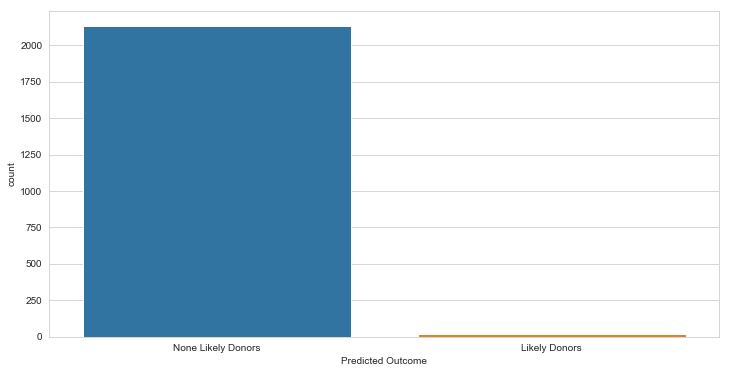

In [126]:
# Visualisation of Proportion of likely donors
#sns.countplot(x='labelled', data=rand_p)
figure(figsize=(12,6))
ax = countplot(data=rand_p,x='Predicted Outcome')
ax.set_xticklabels(["None Likely Donors","Likely Donors"])
show()

In [127]:
# Compute Proportion of likely donors in (%)
outcome_proportions = rand_p.groupby(['Predicted Outcome'])

In [128]:
outcome_proportions.size()

Predicted Outcome
0    2130
1      18
dtype: int64

In [129]:
(17/2131)*100

0.7977475363679024